In [1]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(
    "postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)


user_data = pd.read_sql('SELECT * FROM public.user_data', con=engine)
post_text_df = pd.read_sql('SELECT * FROM public.post_text_df', con=engine)
feed_data = pd.read_sql('SELECT * FROM public.feed_data limit 100000', con=engine)

In [2]:
user_data.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [3]:
post_text_df.head()

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


In [4]:
feed_data.head()

,timestamp,user_id,post_id,action,target
0,2021-10-08 08:54:39,143108,3285,view,0
1,2021-10-08 08:55:20,143108,6505,view,0
2,2021-10-08 08:58:14,143108,2235,view,0
3,2021-10-08 08:59:33,143108,7192,view,0
4,2021-10-08 09:01:06,143108,6867,view,1


In [5]:
data=pd.merge(post_text_df,feed_data,on='post_id')

In [6]:
data=pd.merge(data,user_data,on='user_id')

In [7]:
data.head()

,post_id,text,topic,timestamp,user_id,action,target,gender,age,country,city,exp_group,os,source
0,1,UK economy facing major risks\n\nThe UK manufa...,business,2021-12-28 17:24:25,7929,view,0,1,27,Belarus,Baranavichy,1,Android,ads
1,2368,#Superspreaders fuelling #COVID19 cases\n\nHon...,covid,2021-12-13 09:34:48,7929,view,1,1,27,Belarus,Baranavichy,1,Android,ads
2,2368,#Superspreaders fuelling #COVID19 cases\n\nHon...,covid,2021-12-13 09:35:04,7929,like,0,1,27,Belarus,Baranavichy,1,Android,ads
3,24,Iraq to invite phone licence bids\n\nIraq is t...,business,2021-11-13 15:22:42,7929,view,0,1,27,Belarus,Baranavichy,1,Android,ads
4,32,Split-caps pay £194m compensation\n\nInvestors...,business,2021-12-06 06:25:30,7929,view,0,1,27,Belarus,Baranavichy,1,Android,ads


In [8]:


# Группировка данных по 'post_id' и вычисление общего количества взаимодействий и количества лайков
grouped_data = data.groupby('post_id').agg(
    total_interactions=('action', 'count'),
    like_count=('action', lambda x: (x == 'like').sum())
).reset_index()

grouped_data


,post_id,total_interactions,like_count
0,1,13,2
1,2,14,2
2,3,11,2
3,4,15,3
4,5,16,2
...,...,...,...
6825,7315,27,4
6826,7316,15,0
6827,7317,10,2
6828,7318,8,0


In [9]:
data=pd.merge(grouped_data,data,on='post_id')

In [10]:
data.head()

,post_id,total_interactions,like_count,text,topic,timestamp,user_id,action,target,gender,age,country,city,exp_group,os,source
0,1,13,2,UK economy facing major risks\n\nThe UK manufa...,business,2021-12-28 17:24:25,7929,view,0,1,27,Belarus,Baranavichy,1,Android,ads
1,1,13,2,UK economy facing major risks\n\nThe UK manufa...,business,2021-11-16 10:14:20,93241,view,0,0,56,Russia,Baykit,2,iOS,ads
2,1,13,2,UK economy facing major risks\n\nThe UK manufa...,business,2021-11-28 12:23:52,7930,view,0,1,21,Kazakhstan,Almaty,4,Android,ads
3,1,13,2,UK economy facing major risks\n\nThe UK manufa...,business,2021-12-17 21:12:17,128859,view,0,1,33,Russia,Balashikha,4,Android,organic
4,1,13,2,UK economy facing major risks\n\nThe UK manufa...,business,2021-10-27 14:38:00,143114,view,0,0,28,Russia,Irkutsk,3,Android,organic


In [11]:

# Группировка данных по 'post_id' и вычисление среднего значения возраста
merged_data = pd.merge(feed_data[feed_data['action'] == 'like'],user_data, on='user_id')
grouped_data_2 = merged_data.groupby('post_id').agg(
    avg_age=('age', 'mean')
).reset_index().round(1)

grouped_data_2


,post_id,avg_age
0,1,24.0
1,2,31.0
2,3,24.0
3,4,24.0
4,5,28.0
...,...,...
4932,7313,21.0
4933,7314,30.5
4934,7315,22.0
4935,7317,31.0


In [12]:
data=pd.merge(data,grouped_data_2,on='post_id')

In [13]:
data.head()

,post_id,total_interactions,like_count,text,topic,timestamp,user_id,action,target,gender,age,country,city,exp_group,os,source,avg_age
0,1,13,2,UK economy facing major risks\n\nThe UK manufa...,business,2021-12-28 17:24:25,7929,view,0,1,27,Belarus,Baranavichy,1,Android,ads,24.0
1,1,13,2,UK economy facing major risks\n\nThe UK manufa...,business,2021-11-16 10:14:20,93241,view,0,0,56,Russia,Baykit,2,iOS,ads,24.0
2,1,13,2,UK economy facing major risks\n\nThe UK manufa...,business,2021-11-28 12:23:52,7930,view,0,1,21,Kazakhstan,Almaty,4,Android,ads,24.0
3,1,13,2,UK economy facing major risks\n\nThe UK manufa...,business,2021-12-17 21:12:17,128859,view,0,1,33,Russia,Balashikha,4,Android,organic,24.0
4,1,13,2,UK economy facing major risks\n\nThe UK manufa...,business,2021-10-27 14:38:00,143114,view,0,0,28,Russia,Irkutsk,3,Android,organic,24.0


In [14]:
data=data.sort_values(['timestamp'])

In [15]:
data.head()

,post_id,total_interactions,like_count,text,topic,timestamp,user_id,action,target,gender,age,country,city,exp_group,os,source,avg_age
41758,3082,13,2,#Nowboarding: flights to nowhere for #travelhu...,covid,2021-10-01 06:01:40,52958,view,1,0,25,Russia,Vladivostok,4,Android,ads,25.0
41759,3082,13,2,#Nowboarding: flights to nowhere for #travelhu...,covid,2021-10-01 06:01:59,52958,like,0,0,25,Russia,Vladivostok,4,Android,ads,25.0
3942,420,15,1,Singapore growth at 8.1% in 2004\n\nSingapores...,business,2021-10-01 06:02:01,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,27.0
60830,5049,17,2,"Gregory Pecks acting was excellent, as one wou...",movie,2021-10-01 06:05:49,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,18.0
30692,1958,19,6,Google launches TV search service\n\nThe net s...,tech,2021-10-01 06:06:11,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,22.2


In [16]:
data['avg_age'].nunique()

244

In [17]:
data['exp_group'].nunique()

5

In [18]:
data.head()

,post_id,total_interactions,like_count,text,topic,timestamp,user_id,action,target,gender,age,country,city,exp_group,os,source,avg_age
41758,3082,13,2,#Nowboarding: flights to nowhere for #travelhu...,covid,2021-10-01 06:01:40,52958,view,1,0,25,Russia,Vladivostok,4,Android,ads,25.0
41759,3082,13,2,#Nowboarding: flights to nowhere for #travelhu...,covid,2021-10-01 06:01:59,52958,like,0,0,25,Russia,Vladivostok,4,Android,ads,25.0
3942,420,15,1,Singapore growth at 8.1% in 2004\n\nSingapores...,business,2021-10-01 06:02:01,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,27.0
60830,5049,17,2,"Gregory Pecks acting was excellent, as one wou...",movie,2021-10-01 06:05:49,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,18.0
30692,1958,19,6,Google launches TV search service\n\nThe net s...,tech,2021-10-01 06:06:11,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,22.2


In [19]:
liked_posts = data[data['action'] == 'like']

# Группировка данных, подсчет количества лайков и сортировка результатов
result = liked_posts.groupby(['exp_group', 'topic', 'post_id']).size().reset_index(name='count_like_exp_top_post')
result = result.sort_values(by='count_like_exp_top_post', ascending=False)

result



,exp_group,topic,post_id,count_like_exp_top_post
5288,2,politics,1211,6
5318,2,politics,1307,5
8113,4,movie,6581,5
7914,4,movie,5716,5
4181,2,entertainment,599,5
...,...,...,...,...
3186,1,sport,1436,1
3185,1,sport,1435,1
3184,1,sport,1434,1
3182,1,sport,1431,1


In [20]:
liked_posts = data[data['action'] == 'like']

# Группировка данных, подсчет количества лайков и сортировка результатов
result = liked_posts.groupby(['exp_group', 'topic', 'post_id']).size().reset_index(name='count_like_exp_top_post')
result = result.sort_values(by='count_like_exp_top_post', ascending=False)

# Нахождение самой популярной темы для каждой exp_group
top_topics = result.groupby('exp_group').apply(lambda x: x.nlargest(1, 'count_like_exp_top_post')).reset_index(drop=True)

top_topics




,exp_group,topic,post_id,count_like_exp_top_post
0,0,covid,2518,5
1,1,sport,1411,4
2,2,politics,1211,6
3,3,sport,1590,3
4,4,movie,6581,5


In [21]:
# Нахождение самых популярных тем для каждой exp_group
top_topics = result.groupby('exp_group').apply(lambda x: x.nlargest(1, 'count_like_exp_top_post')).reset_index(drop=True)

# Создание словаря с соответствием exp_group и самой популярной темы
top_topics_dict = dict(zip(top_topics['exp_group'], top_topics['topic']))

# Замена значений в столбце topic на самые популярные темы для каждой exp_group
data['topic'] = data['exp_group'].map(top_topics_dict)

data


,post_id,total_interactions,like_count,text,topic,timestamp,user_id,action,target,gender,age,country,city,exp_group,os,source,avg_age
41758,3082,13,2,#Nowboarding: flights to nowhere for #travelhu...,movie,2021-10-01 06:01:40,52958,view,1,0,25,Russia,Vladivostok,4,Android,ads,25.0
41759,3082,13,2,#Nowboarding: flights to nowhere for #travelhu...,movie,2021-10-01 06:01:59,52958,like,0,0,25,Russia,Vladivostok,4,Android,ads,25.0
3942,420,15,1,Singapore growth at 8.1% in 2004\n\nSingapores...,movie,2021-10-01 06:02:01,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,27.0
60830,5049,17,2,"Gregory Pecks acting was excellent, as one wou...",movie,2021-10-01 06:05:49,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,18.0
30692,1958,19,6,Google launches TV search service\n\nThe net s...,movie,2021-10-01 06:06:11,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63822,5340,17,3,This has to be the all time best computer anim...,covid,2021-12-29 22:26:00,128873,view,0,0,17,Russia,Podolsk,0,Android,organic,29.0
33072,2263,15,1,Attack prompts Bush site block\n\nThe official...,covid,2021-12-29 22:28:28,128873,view,0,0,17,Russia,Podolsk,0,Android,organic,21.0
56032,4516,6,1,"The Big Knife, a movie about the dark side of ...",covid,2021-12-29 22:31:49,128873,view,0,0,17,Russia,Podolsk,0,Android,organic,31.0
705,79,10,1,Saudi NCCIs shares soar\n\nShares in Saudi Ara...,covid,2021-12-29 22:33:09,128873,view,0,0,17,Russia,Podolsk,0,Android,organic,16.0


In [22]:
data.head()

,post_id,total_interactions,like_count,text,topic,timestamp,user_id,action,target,gender,age,country,city,exp_group,os,source,avg_age
41758,3082,13,2,#Nowboarding: flights to nowhere for #travelhu...,movie,2021-10-01 06:01:40,52958,view,1,0,25,Russia,Vladivostok,4,Android,ads,25.0
41759,3082,13,2,#Nowboarding: flights to nowhere for #travelhu...,movie,2021-10-01 06:01:59,52958,like,0,0,25,Russia,Vladivostok,4,Android,ads,25.0
3942,420,15,1,Singapore growth at 8.1% in 2004\n\nSingapores...,movie,2021-10-01 06:02:01,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,27.0
60830,5049,17,2,"Gregory Pecks acting was excellent, as one wou...",movie,2021-10-01 06:05:49,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,18.0
30692,1958,19,6,Google launches TV search service\n\nThe net s...,movie,2021-10-01 06:06:11,52958,view,0,0,25,Russia,Vladivostok,4,Android,ads,22.2


In [23]:
data.reset_index(drop=True, inplace=True)


In [24]:
data=data.drop('age',axis=1)

In [25]:
data.head()

,post_id,total_interactions,like_count,text,topic,timestamp,user_id,action,target,gender,country,city,exp_group,os,source,avg_age
0,3082,13,2,#Nowboarding: flights to nowhere for #travelhu...,movie,2021-10-01 06:01:40,52958,view,1,0,Russia,Vladivostok,4,Android,ads,25.0
1,3082,13,2,#Nowboarding: flights to nowhere for #travelhu...,movie,2021-10-01 06:01:59,52958,like,0,0,Russia,Vladivostok,4,Android,ads,25.0
2,420,15,1,Singapore growth at 8.1% in 2004\n\nSingapores...,movie,2021-10-01 06:02:01,52958,view,0,0,Russia,Vladivostok,4,Android,ads,27.0
3,5049,17,2,"Gregory Pecks acting was excellent, as one wou...",movie,2021-10-01 06:05:49,52958,view,0,0,Russia,Vladivostok,4,Android,ads,18.0
4,1958,19,6,Google launches TV search service\n\nThe net s...,movie,2021-10-01 06:06:11,52958,view,0,0,Russia,Vladivostok,4,Android,ads,22.2


In [26]:
data=data.drop(['text','timestamp','post_id','user_id'],axis=1)

In [27]:
data.head()

,total_interactions,like_count,topic,action,target,gender,country,city,exp_group,os,source,avg_age
0,13,2,movie,view,1,0,Russia,Vladivostok,4,Android,ads,25.0
1,13,2,movie,like,0,0,Russia,Vladivostok,4,Android,ads,25.0
2,15,1,movie,view,0,0,Russia,Vladivostok,4,Android,ads,27.0
3,17,2,movie,view,0,0,Russia,Vladivostok,4,Android,ads,18.0
4,19,6,movie,view,0,0,Russia,Vladivostok,4,Android,ads,22.2


In [28]:
data.dtypes

total_interactions      int64
like_count              int64
topic                  object
action                 object
target                  int64
gender                  int64
country                object
city                   object
exp_group               int64
os                     object
source                 object
avg_age               float64
dtype: object

In [47]:
X=data.drop(['target','action'],axis=1)
y=data.target

In [62]:
X

,total_interactions,like_count,topic,gender,country,city,exp_group,os,source,avg_age
0,13,2,movie,0,Russia,Vladivostok,4,Android,ads,25.0
1,13,2,movie,0,Russia,Vladivostok,4,Android,ads,25.0
2,15,1,movie,0,Russia,Vladivostok,4,Android,ads,27.0
3,17,2,movie,0,Russia,Vladivostok,4,Android,ads,18.0
4,19,6,movie,0,Russia,Vladivostok,4,Android,ads,22.2
...,...,...,...,...,...,...,...,...,...,...
82784,17,3,covid,0,Russia,Podolsk,0,Android,organic,29.0
82785,15,1,covid,0,Russia,Podolsk,0,Android,organic,21.0
82786,6,1,covid,0,Russia,Podolsk,0,Android,organic,31.0
82787,10,1,covid,0,Russia,Podolsk,0,Android,organic,16.0


In [49]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [50]:
catboost=CatBoostClassifier()

In [51]:
catboost.fit(X_train,y_train,cat_features=['topic','country', 'city','os', 'source'])

Learning rate set to 0.061734
0:	learn: 0.6505734	total: 82.5ms	remaining: 1m 22s
1:	learn: 0.6138261	total: 133ms	remaining: 1m 6s
2:	learn: 0.5807679	total: 188ms	remaining: 1m 2s
3:	learn: 0.5528110	total: 248ms	remaining: 1m 1s
4:	learn: 0.5299873	total: 290ms	remaining: 57.7s
5:	learn: 0.5106102	total: 312ms	remaining: 51.6s
6:	learn: 0.4938713	total: 353ms	remaining: 50.1s
7:	learn: 0.4791218	total: 388ms	remaining: 48.1s
8:	learn: 0.4657546	total: 422ms	remaining: 46.5s
9:	learn: 0.4541424	total: 462ms	remaining: 45.7s
10:	learn: 0.4435955	total: 514ms	remaining: 46.2s
11:	learn: 0.4351462	total: 559ms	remaining: 46s
12:	learn: 0.4274353	total: 603ms	remaining: 45.8s
13:	learn: 0.4215444	total: 635ms	remaining: 44.7s
14:	learn: 0.4160309	total: 674ms	remaining: 44.3s
15:	learn: 0.4116467	total: 696ms	remaining: 42.8s
16:	learn: 0.4076750	total: 731ms	remaining: 42.3s
17:	learn: 0.4034100	total: 781ms	remaining: 42.6s
18:	learn: 0.4004793	total: 803ms	remaining: 41.4s
19:	learn: 

In [52]:
test_preds=catboost.predict(X_test)
train_preds=catboost.predict(X_train)

In [53]:
test_error=np.mean(test_preds-y_test)**2
train_error=np.mean(train_preds-y_train)**2

In [54]:
train_error

0.01669636535647351

In [55]:
test_error

0.01587131282335997

In [56]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay

In [57]:
catboost.predict_proba(X_train)

array([[0.78689018, 0.21310982],
       [0.95813604, 0.04186396],
       [0.80089362, 0.19910638],
       ...,
       [0.82126216, 0.17873784],
       [0.8049466 , 0.1950534 ],
       [0.94175782, 0.05824218]])

In [58]:
fpr,tpr,thresholds=roc_curve(y_test,catboost.predict_proba(X_test)[:,1])

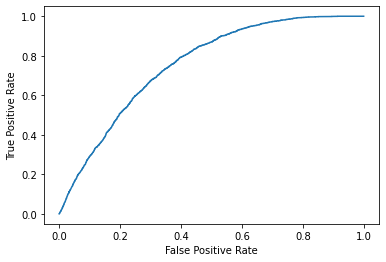

In [59]:
RocCurveDisplay(fpr=fpr,tpr=tpr).plot()

In [60]:
auc(fpr,tpr).round(3)

0.755

In [61]:
catboost.save_model('catboost_model_v_2',
                          format="cbm")